<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/46_Analisis_de_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error

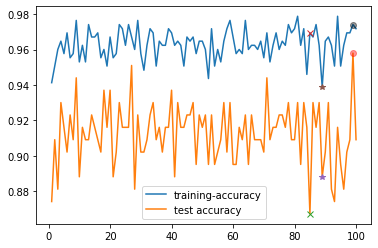

In [ ]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3).fit(X_train, y_train)

accuracy_training = []
accuracy_test = []
settings = range(1, 101)

for _, tree in enumerate(forest.estimators_):

  tree.fit(X_train, y_train)

  accuracy_training.append(tree.score(X_train, y_train))
  
  accuracy_test.append(tree.score(X_test, y_test))

plt.plot(settings, accuracy_training, label='training-accuracy')
plt.plot(range(1, len(forest.estimators_)+1), accuracy_test, label='test accuracy')
plt.plot(99, forest.estimators_[98].score(X_train, y_train), 'o', c='black', alpha=.4)
plt.plot(99, forest.estimators_[98].score(X_test, y_test), 'o', c='red', alpha=.4)
plt.plot(85, forest.estimators_[84].score(X_test, y_test), 'x')
plt.plot(85, forest.estimators_[84].score(X_train, y_train), 'x')
plt.plot(89, forest.estimators_[88].score(X_test, y_test), '*')
plt.plot(89, forest.estimators_[88].score(X_train, y_train), '*')
plt.legend(loc='best')
plt.show()

In [ ]:
mse = []

for tree in forest.estimators_:

  tree.fit(X_train, y_train)

  pred = tree.predict(X_test)

  mse.append(mean_squared_error(pred, y_test))

data_mse = pd.DataFrame({'tree':forest.estimators_, 'MSE':mse})

_tree = data_mse[data_mse['MSE'] == data_mse['MSE'].min()]

_tree



,tree,MSE
98,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.041958


In [ ]:
x = [i for i, x in enumerate(accuracy_training) if x == np.min(accuracy_training)]
y = [i for i, x in enumerate(accuracy_test) if x == np.min(accuracy_test)]

# how y have here score mi in test[84]



1